Emma Klemets, Nov 2022   
To investigate if we have aligned the old and new data properly.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import pandas as pd
import sys, os
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from matplotlib.ticker import FormatStrFormatter

sys.path.insert(1, '../PrettyPlotTools/')
import ParticlePlottingFunctions as ppf
import seaborn as sns

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
colNames = ['x', 'y', 'z','B_x', 'B_y', 'B_z']

file_22 = "data_export/map_referencedMSR_fall2022_together_interp50.txt"
data_22 = pd.read_csv(file_22, comment='#', sep='\t', names=colNames)

file_19 = "../MagMapping-export_TH_2019/data_export/map_referencedMSR_interp50.txt"
data_19 = pd.read_csv(file_19, comment='#', sep='\t', names=colNames)

In [4]:
cut_22 = "data_export/map_referencedMSR_fall2022_together_CUT_interp50.txt"
dataCut_22 = pd.read_csv(cut_22, comment='#', sep='\t', names=colNames)

#the data in this file for the B field is 
cut_19 = "../MagMapping-export_TH_2019/data_export/map_referencedMSR_interp_CUT_interp50.txt"
dataCut_19 = pd.read_csv(cut_19, comment='#', sep='\t', names=colNames)

In [5]:
print("2019 limits:")
mins_19 = np.min(dataCut_19)
max_19 = np.max(dataCut_19)
print(mins_19,'\n', max_19)

print("2022 limits:")
mins_22 = np.min(dataCut_22)
max_22 = np.max(dataCut_22)

print(mins_22, '\n',max_22)

2019 limits:
x      -90.100000
y     -174.711330
z     -150.751650
B_x   -103.579643
B_y    -79.578744
B_z   -256.526638
dtype: float64 
 x      123.609390
y      -94.612790
z        9.257800
B_x     -5.617606
B_y    -32.184553
B_z   -156.833015
dtype: float64
2022 limits:
x      -90.100000
y     -174.711330
z     -150.751650
B_x    -94.285496
B_y    -94.418055
B_z   -263.919420
dtype: float64 
 x      123.609390
y      -94.612790
z        9.257800
B_x      5.140000
B_y    -28.791676
B_z   -160.995889
dtype: float64


C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:84: FutureWarning: In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'
  return reduction(axis=axis, out=out, **passkwargs)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:84: FutureWarning: In a future version, DataFrame.max(axis=None) will return a scalar max over the entire DataFrame. To retain the old behavior, use 'frame.max(axis=0)' or just 'frame.max()'
  return reduction(axis=axis, out=out, **passkwargs)


In [6]:
# list(dataCut_19.columns)

df_compare = dataCut_19.join(dataCut_22, rsuffix='_22', how='outer')
#                               on=list(dataCut_22.columns))

# df_compare.loc[0]['x_19'] = 0
# display(df_compare.columns)
df_compare = df_compare.where((df_compare['x']==df_compare['x_22']) & 
                                      (df_compare['y']==df_compare['y_22']) &
                                      (df_compare['z']==df_compare['z_22']))
df_compare = df_compare.drop(columns=['x_22', 'y_22', 'z_22'])
# display(df_compare)

df_compare['dB_x'] = df_compare['B_x'] - df_compare['B_x_22'] 
df_compare['dB_y'] = df_compare['B_y'] - df_compare['B_y_22'] 
df_compare['dB_z'] = df_compare['B_z'] - df_compare['B_z_22'] 

# display(df_compare)

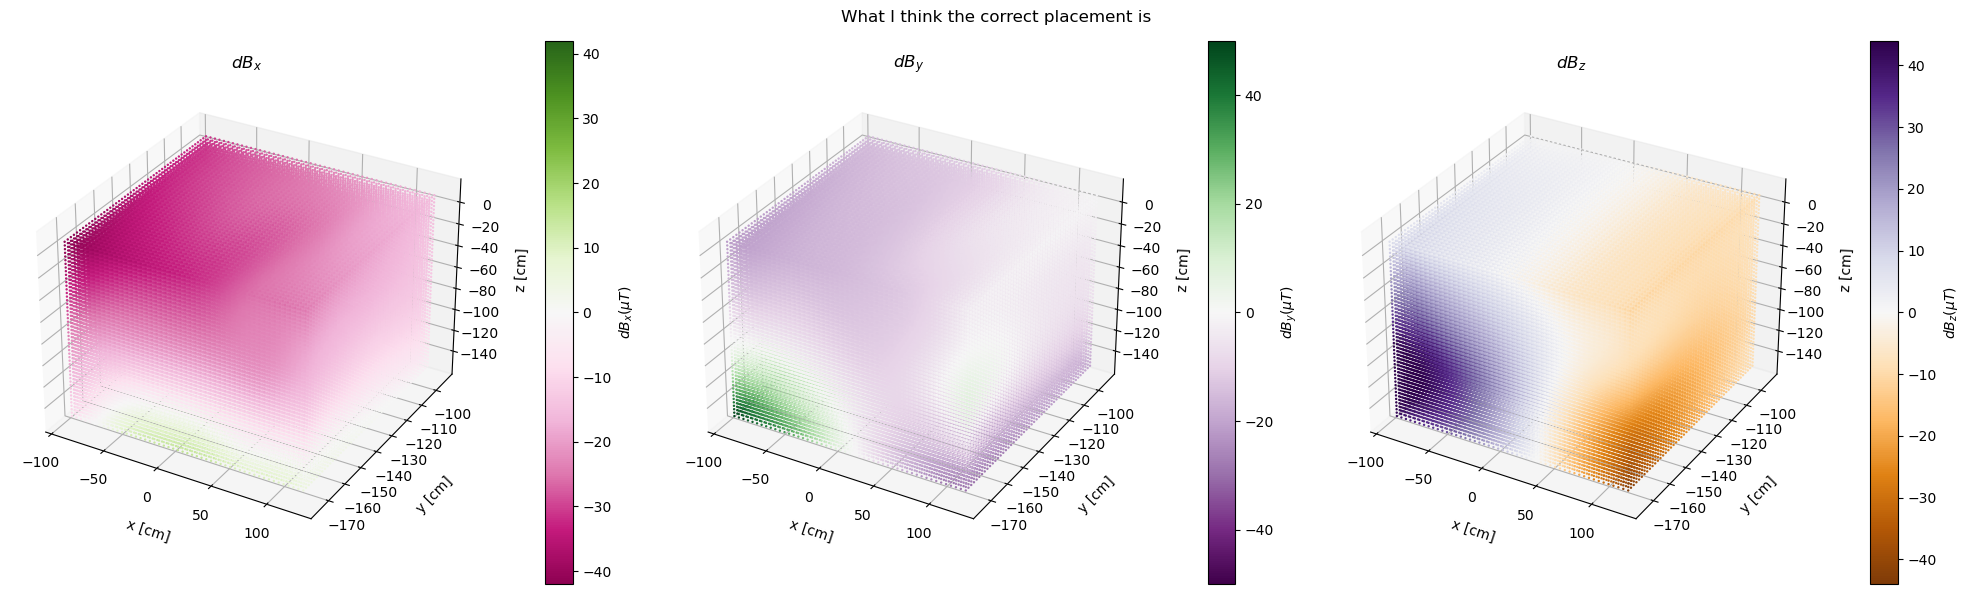

In [9]:
limsA = np.array([[-42, 42], [-50, 50], [-44, 44]])
# titleS = "Difference of mapping data components \n 2019 data - 2022 data"
titleS = "What I think the correct placement is"


ppf.PlotComponents(df_compare, Compare=True, lims=limsA, title=titleS, Sample=None)
# plt.savefig('plots/compare_3C.png', bbox_inches='tight')
plt.show()

In [8]:
print("mean (x,y,z): ", np.mean(df_compare['dB_x']), np.mean(df_compare['dB_y']), 
      np.mean(df_compare['dB_z']))
print("STD (x,y,z): ", np.std(df_compare['dB_x']), np.std(df_compare['dB_y']), 
      np.std(df_compare['dB_z']))

mean (x,y,z):  -16.79683725262247 -6.654554952087327 5.52693342547019
STD (x,y,z):  8.56961242513111 7.211486929980489 13.09056371785573
